# **LCM-LoRA**

This Python Notebook is tailored for executing customized LCM LoRA models on Google Colab utilizing a T4 GPU. These models, customized for your client, are open-source and available for unrestricted usage. They empower you to generate high-resolution images through streamlined inference steps. Enjoy your image synthesis journey! 😃


# **Download the necessary dependencies for the customized LCM LoRA model.**

In [1]:
!pip install --quiet --upgrade diffusers accelerate
!pip install --quiet -U peft transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

# **Build and generate away!**



Note: Please provide detailed and specific prompts. For instance, instead of using a prompt like "Crack on wall," consider using "A single spilt crack on a concrete wall." Additionally, if the desired output does not appear initially, try running the prompt again.

For optimal results, it's advisable to maintain a guidance scale of 1 and limit the number of steps to a range between 2 and 8 during generation. If you're interested in understanding how these parameters influence your outcomes click 'Read more'

<details>
  <summary>Read more</summary>
  <p>

*  Number of Steps: This parameter in LCM LoRA models controls the iteration count during image generation. Increasing steps refines details but demands more computation, while fewer steps expedite the process at the cost of detail.

*  Guidance Scale: Crucial in LCM LoRA, the guidance scale regulates the influence of input guidance on image generation. Higher scales prioritize guidance fidelity, while lower ones promote creative variation, balancing between adherence to guidance and creative freedom. Adjusting this scale fine-tunes the model's output based on the desired level of control.
  </p>
</details>


In [14]:
# @title Build and load your model
SD_Models = "runwayml/stable-diffusion-v1-5"
LoRA_Models = "latent-consistency/lcm-lora-sdv1-5"

from diffusers import DiffusionPipeline, LCMScheduler
import torch
import time

pipe = DiffusionPipeline.from_pretrained(
    SD_Models,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    )

pipe.load_lora_weights(LoRA_Models)
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)

pipe = pipe.to("cuda", dtype=torch.float16)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Total time taken for Generating Image: 0.8241391181945801 seconds



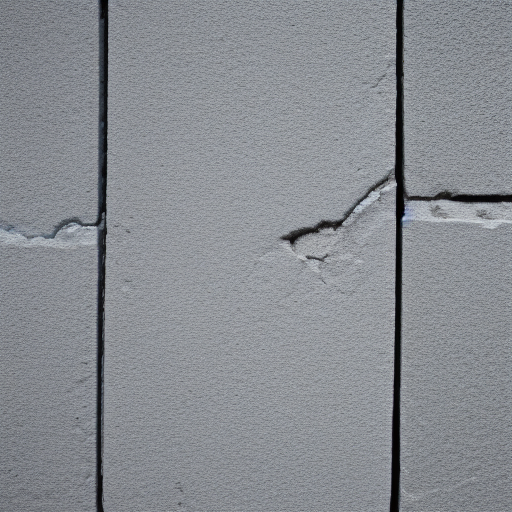

In [17]:
# @title Enter your Prompt and Run
Prompt = "A single spilt crack on a concrete wall " # @param {type:"string"}
No_of_Steps = 4 # @param {type:"integer"}
Guidance_Scale = 1 # @param {type:"number"}

start_time = time.time()
images = pipe(
    prompt=Prompt,
    num_inference_steps=No_of_Steps,
    guidance_scale=Guidance_Scale,
).images[0]
end_time = time.time()

total_time = end_time - start_time
print(f"Total time taken for Generating Image: {total_time} seconds\n")
images